# Machine Learning With Python IBM

### In this project, I applied four machine learning algorithms to a loan data set and the accuracy is checked by using the test data set.

### Step # 01: Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
#matplotlib inline
import itertools
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

### Step # 02: Loading the data set

The dataset is about past loans acquired on the basis of different features. The Loan_train.csv data set includes details of 346 customers whose loan are paid or in collection. The data set contains different features which are briefly mentioned below:

| Field | Description   |
|------|------|
|   Loan_status  | Whether a loan is paid off or is in collection|
|   Principal  | Basic principal loan amount at the time of loan approval|
|   Terms  | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
|   Effective_date	  | When the loan got originated and took effects |
|   Due_date  | As it’s a one-time payoff schedule, each loan has one single due date |
|   Age  | Age of Applicant |
|   Education  | Education of Applicant |
|   Gender  | The Gender of the Applicant |


In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-11-09 19:34:05--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: 'loan_train.csv'

     0K .......... .......... ..                              100%  119K=0.2s

2020-11-09 19:34:07 (119 KB/s) - 'loan_train.csv' saved [23101/23101]



In [3]:
df = pd.read_csv('loan_train.csv')
df

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...,...,...
341,394,394,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,395,395,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,397,397,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,398,398,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male


In [4]:
df.keys()

Index(['Unnamed: 0', 'Unnamed: 0.1', 'loan_status', 'Principal', 'terms',
       'effective_date', 'due_date', 'age', 'education', 'Gender'],
      dtype='object')

In [5]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,Principal,terms,age
count,346.000000,346.000000,346.000000,346.000000,346.000000
mean,202.167630,202.167630,943.641618,22.653179,30.939306
std,115.459715,115.459715,109.425530,7.991006,6.039418
min,0.000000,0.000000,300.000000,7.000000,18.000000
25%,107.250000,107.250000,900.000000,15.000000,27.000000
50%,204.500000,204.500000,1000.000000,30.000000,30.000000
75%,298.750000,298.750000,1000.000000,30.000000,35.000000
max,399.000000,399.000000,1000.000000,30.000000,51.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      346 non-null    int64 
 1   Unnamed: 0.1    346 non-null    int64 
 2   loan_status     346 non-null    object
 3   Principal       346 non-null    int64 
 4   terms           346 non-null    int64 
 5   effective_date  346 non-null    object
 6   due_date        346 non-null    object
 7   age             346 non-null    int64 
 8   education       346 non-null    object
 9   Gender          346 non-null    object
dtypes: int64(5), object(5)
memory usage: 27.2+ KB


In [7]:
df.shape

(346, 10)

### Converting the data to date time object

In [8]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head(5)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


### Step #03: Data Visualization and pre processing

In [9]:
loan_paid = df['loan_status'].value_counts()
loan_paid

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

Out of the 346 total applicant, 260 have paid their loan, while 86 have gone into collection.

In [10]:
loan_paid_total = df[df['loan_status']=='PAIDOFF']

In [11]:
print("Total applicants who paid their loan = ", (len(loan_paid_total)/len(df))*100, '%')

Total applicants who paid their loan =  75.14450867052022 %


In [12]:
collection_total = df[df['loan_status']=='COLLECTION']

In [13]:
print("Total applicants with loan in collection = ", (len(collection_total)/len(df))*100, '%')

Total applicants with loan in collection =  24.85549132947977 %


#### Checking the correlation between the data set features.

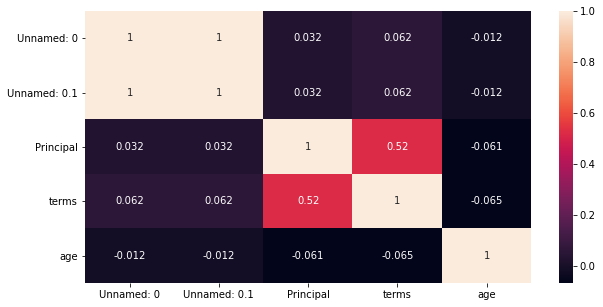

In [14]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)

### Let's see the similar features in our data set by using pairplot.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


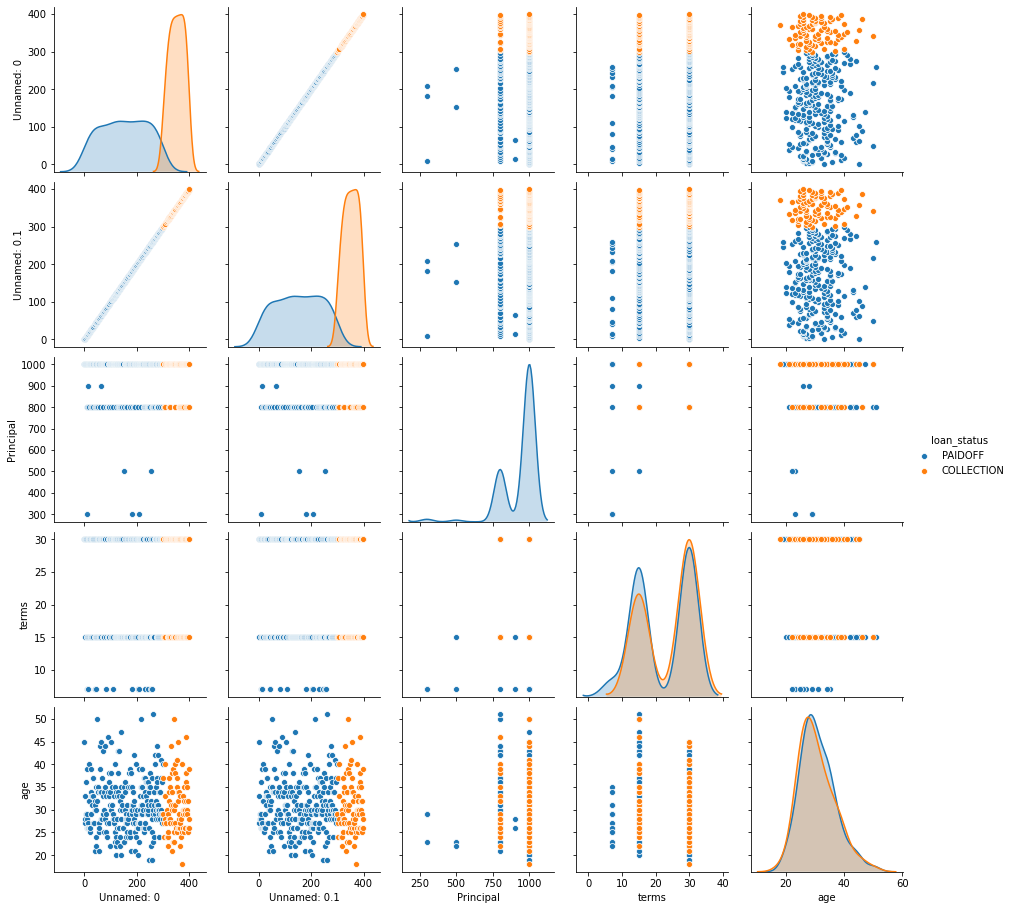

In [15]:
sns.pairplot(df, hue = 'loan_status')

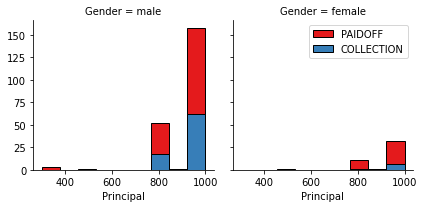

In [16]:
bins_width = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue='loan_status', palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins_width, ec = "k")
g.axes[-1].legend()
plt.show()

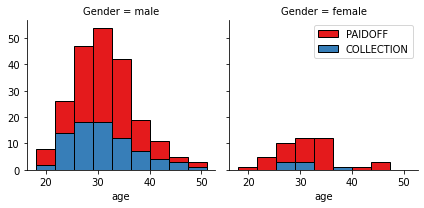

In [17]:
bins_width = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue='loan_status', palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins_width, ec = "k")
g.axes[-1].legend()
plt.show()

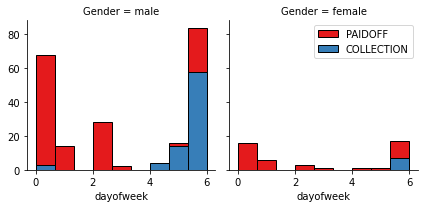

In [18]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins_width = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins_width, ec = "k")
g.axes[-1].legend()
plt.show()

It is clear that people, who get the loan at the end of the week don't pay it off. We can set threshold values to less than day 4 by using Feature Binarization.

In [19]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df[0:5]

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


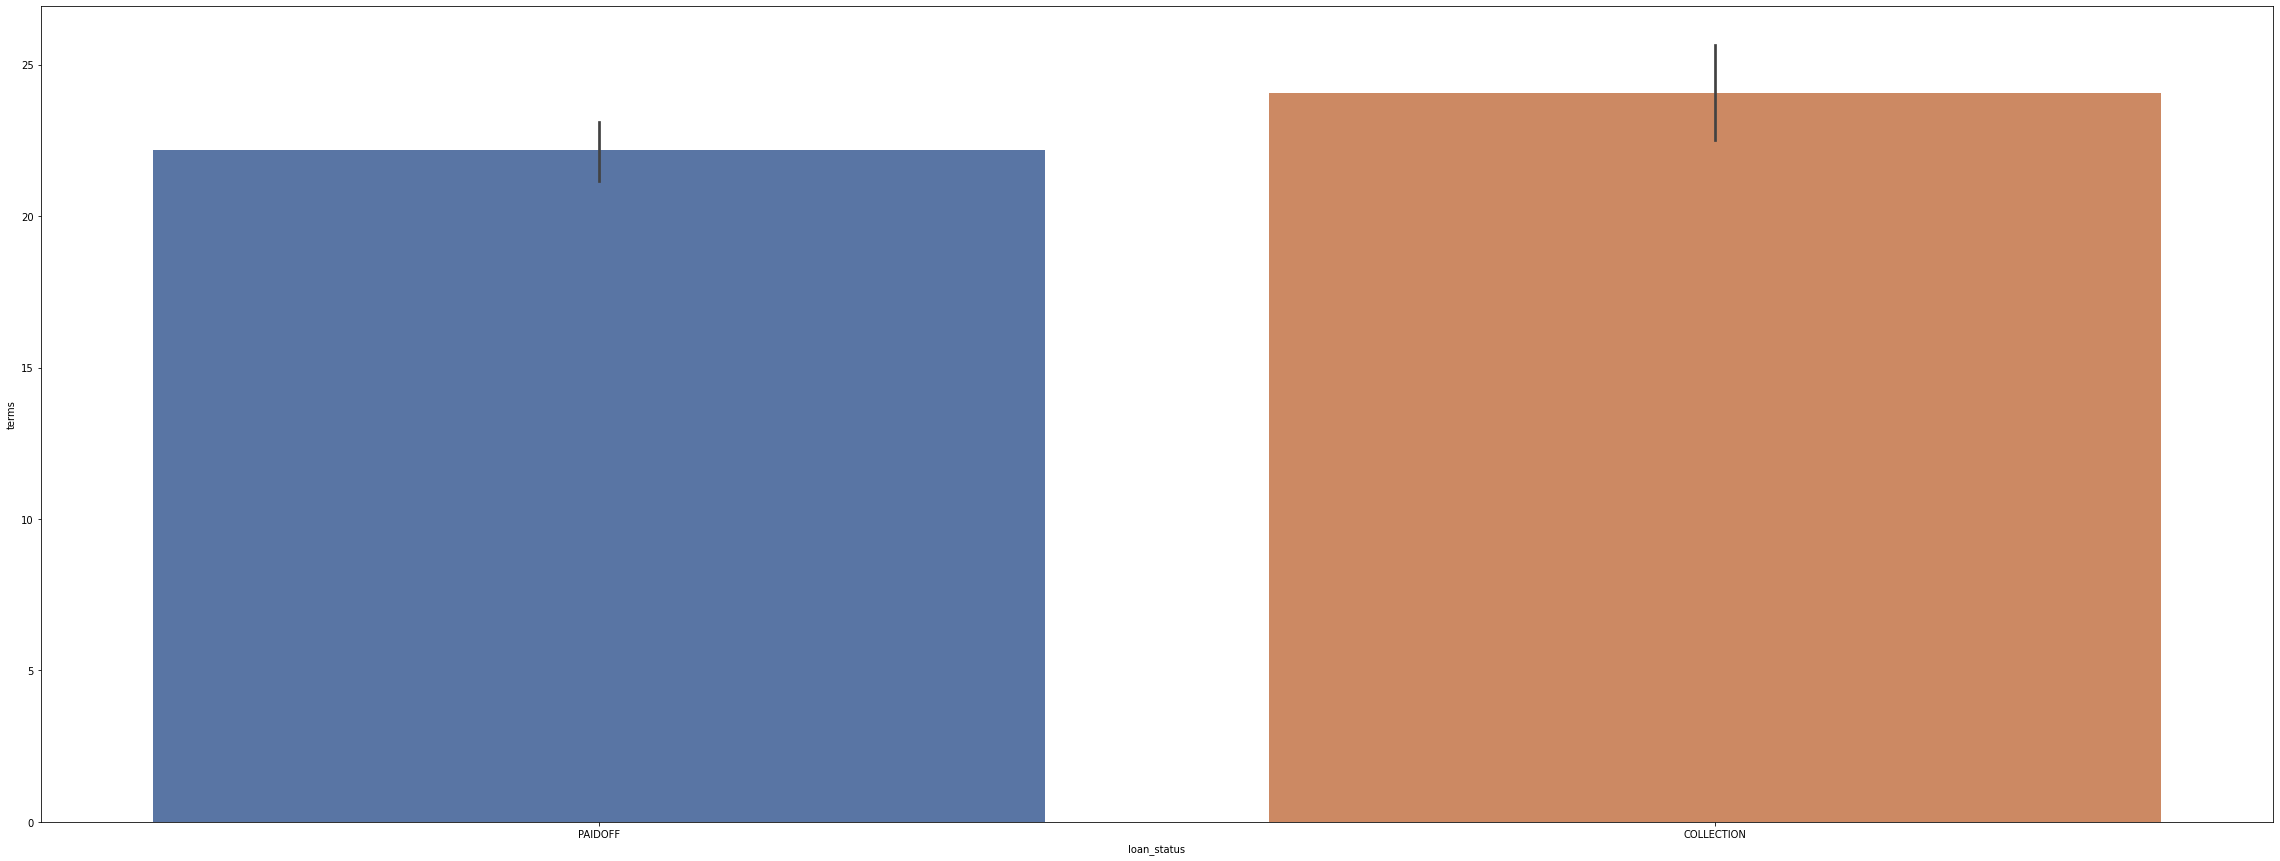

In [20]:
plt.figure(figsize= (40,15))
sns.barplot(x = 'loan_status', y = 'terms', data = df, palette='deep')

In [21]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize = True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay their loans while only 73 % of males pay their loan. As the Gender is a categorical feature, we have to convert it into numerical as the machine learning model requires binary features which will correspond to the categorical features.

Lets convert male to 0 and female to 1:

In [22]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


Let's see how the education has an effect on the load status.

In [23]:
df.groupby(['education'])['loan_status'].value_counts(normalize = True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

As the Master or Above feature has 50% value for loan_status paid off or collection, we will be dropping this feature as it will overburden our model calculation and can affect the accuracy.

In [24]:
education_dummies = pd.get_dummies(df['education'])
education_dummies[0:5]

,Bechalor,High School or Below,Master or Above,college
0,0,1,0,0
1,1,0,0,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


One hot encoding technique is used to convert categorical features to binary and concatenating them to the original Data Frame.

In [25]:
df = pd.concat([df, education_dummies], axis = 1)
df.drop(['Master or Above'], axis = 1, inplace = True)

In [26]:
df.head(5)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend,Bechalor,High School or Below,college
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0,0,1,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0,1,0,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0,0,0,1
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1,0,0,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1,0,0,1


### Step #04: Selecting the features for the models

In [27]:
X = df[['Principal', 'terms', 'age', 'Gender', 'weekend', 'Bechalor', 'High School or Below', 'college']]

In [28]:
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [29]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

### Using normalization to get the data values between 0 and 1

In [30]:
from sklearn.preprocessing import StandardScaler
my_scaler = StandardScaler()
X = my_scaler.fit_transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

### Creating the training and testing data sets

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 4)

In [32]:
print("Training set : ", X_train.shape, y_train.shape)
print("Testing set : ", X_test.shape, y_test.shape)

Training set :  (276, 8) (276,)
Testing set :  (70, 8) (70,)


# Classification Models:

By using the training data set, accurate models are built for the following machine learning algorithms. The test data set is used to report the accuracy of the model. Following algorithms are used:

- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machines
- Logistic Regression

### K-Nearest Neighbour

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k = 5
my_KNN_classifier = KNeighborsClassifier(n_neighbors=k)
my_KNN_classifier.fit(X_train, y_train)
my_KNN_classifier

KNeighborsClassifier()

In [34]:
y_predict_KNN = my_KNN_classifier.predict(X_test)
y_predict_KNN[0:5]

array(['PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [35]:
print("Train set Accuracy: ", accuracy_score(y_train, my_KNN_classifier.predict(X_train)))
print("Test set Accuracy: ", accuracy_score(y_test, y_predict_KNN))

Train set Accuracy:  0.8152173913043478
Test set Accuracy:  0.7571428571428571


K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the User. So, how can we choose right value for K? The general solution is to reserve a part of your data for testing the accuracy of the model. Then chose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

In [36]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    my_KNN_classifier = KNeighborsClassifier(n_neighbors=n)
    my_KNN_classifier.fit(X_train, y_train)
    y_predict_KNN = my_KNN_classifier.predict(X_test)
    mean_acc[n-1] = accuracy_score(y_test, y_predict_KNN)
    
    std_acc[n-1] = np.std(y_predict_KNN == y_test)/np.sqrt(y_predict_KNN.shape[0])
    
mean_acc

array([0.67142857, 0.65714286, 0.71428571, 0.68571429, 0.75714286,
       0.71428571, 0.78571429, 0.75714286, 0.75714286])

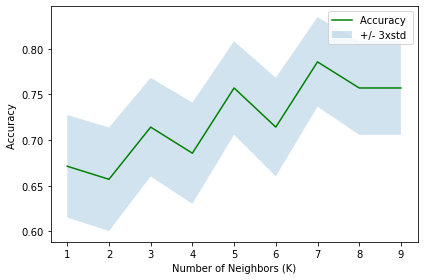

In [37]:
plt.plot(range(1,Ks), mean_acc, 'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.2)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [38]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.7857142857142857 with k= 7


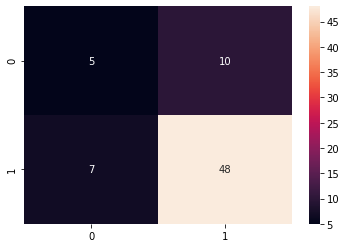

In [39]:
cm = confusion_matrix(y_test, y_predict_KNN)
sns.heatmap(cm, annot=True)

In [40]:
jaccard_KNN_score = jaccard_score(y_test, y_predict_KNN, average = None)
jaccard_KNN_score = jaccard_KNN_score[1]
jaccard_KNN_score = float("{:.2f}".format(jaccard_KNN_score))
jaccard_KNN_score

0.74

### Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
my_decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
X_train_DTC, X_test_DTC, y_train_DTC, y_test_DTC = train_test_split(X,y,test_size = 0.3, random_state = 3)
my_decision_tree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [42]:
my_decision_tree.fit(X_train_DTC, y_train_DTC)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [43]:
y_predict_DTC = my_decision_tree.predict(X_test_DTC)

In [44]:
print("Actual Truth : ",y_test_DTC[0:5])
print("Model Prediction : ",y_predict_DTC[0:5])

Actual Truth :  ['PAIDOFF' 'PAIDOFF' 'COLLECTION' 'COLLECTION' 'PAIDOFF']
Model Prediction :  ['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


In [45]:
print("Accuracy of the Decision Tree", accuracy_score(y_test_DTC, y_predict_DTC))

Accuracy of the Decision Tree 0.6538461538461539


In [46]:
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

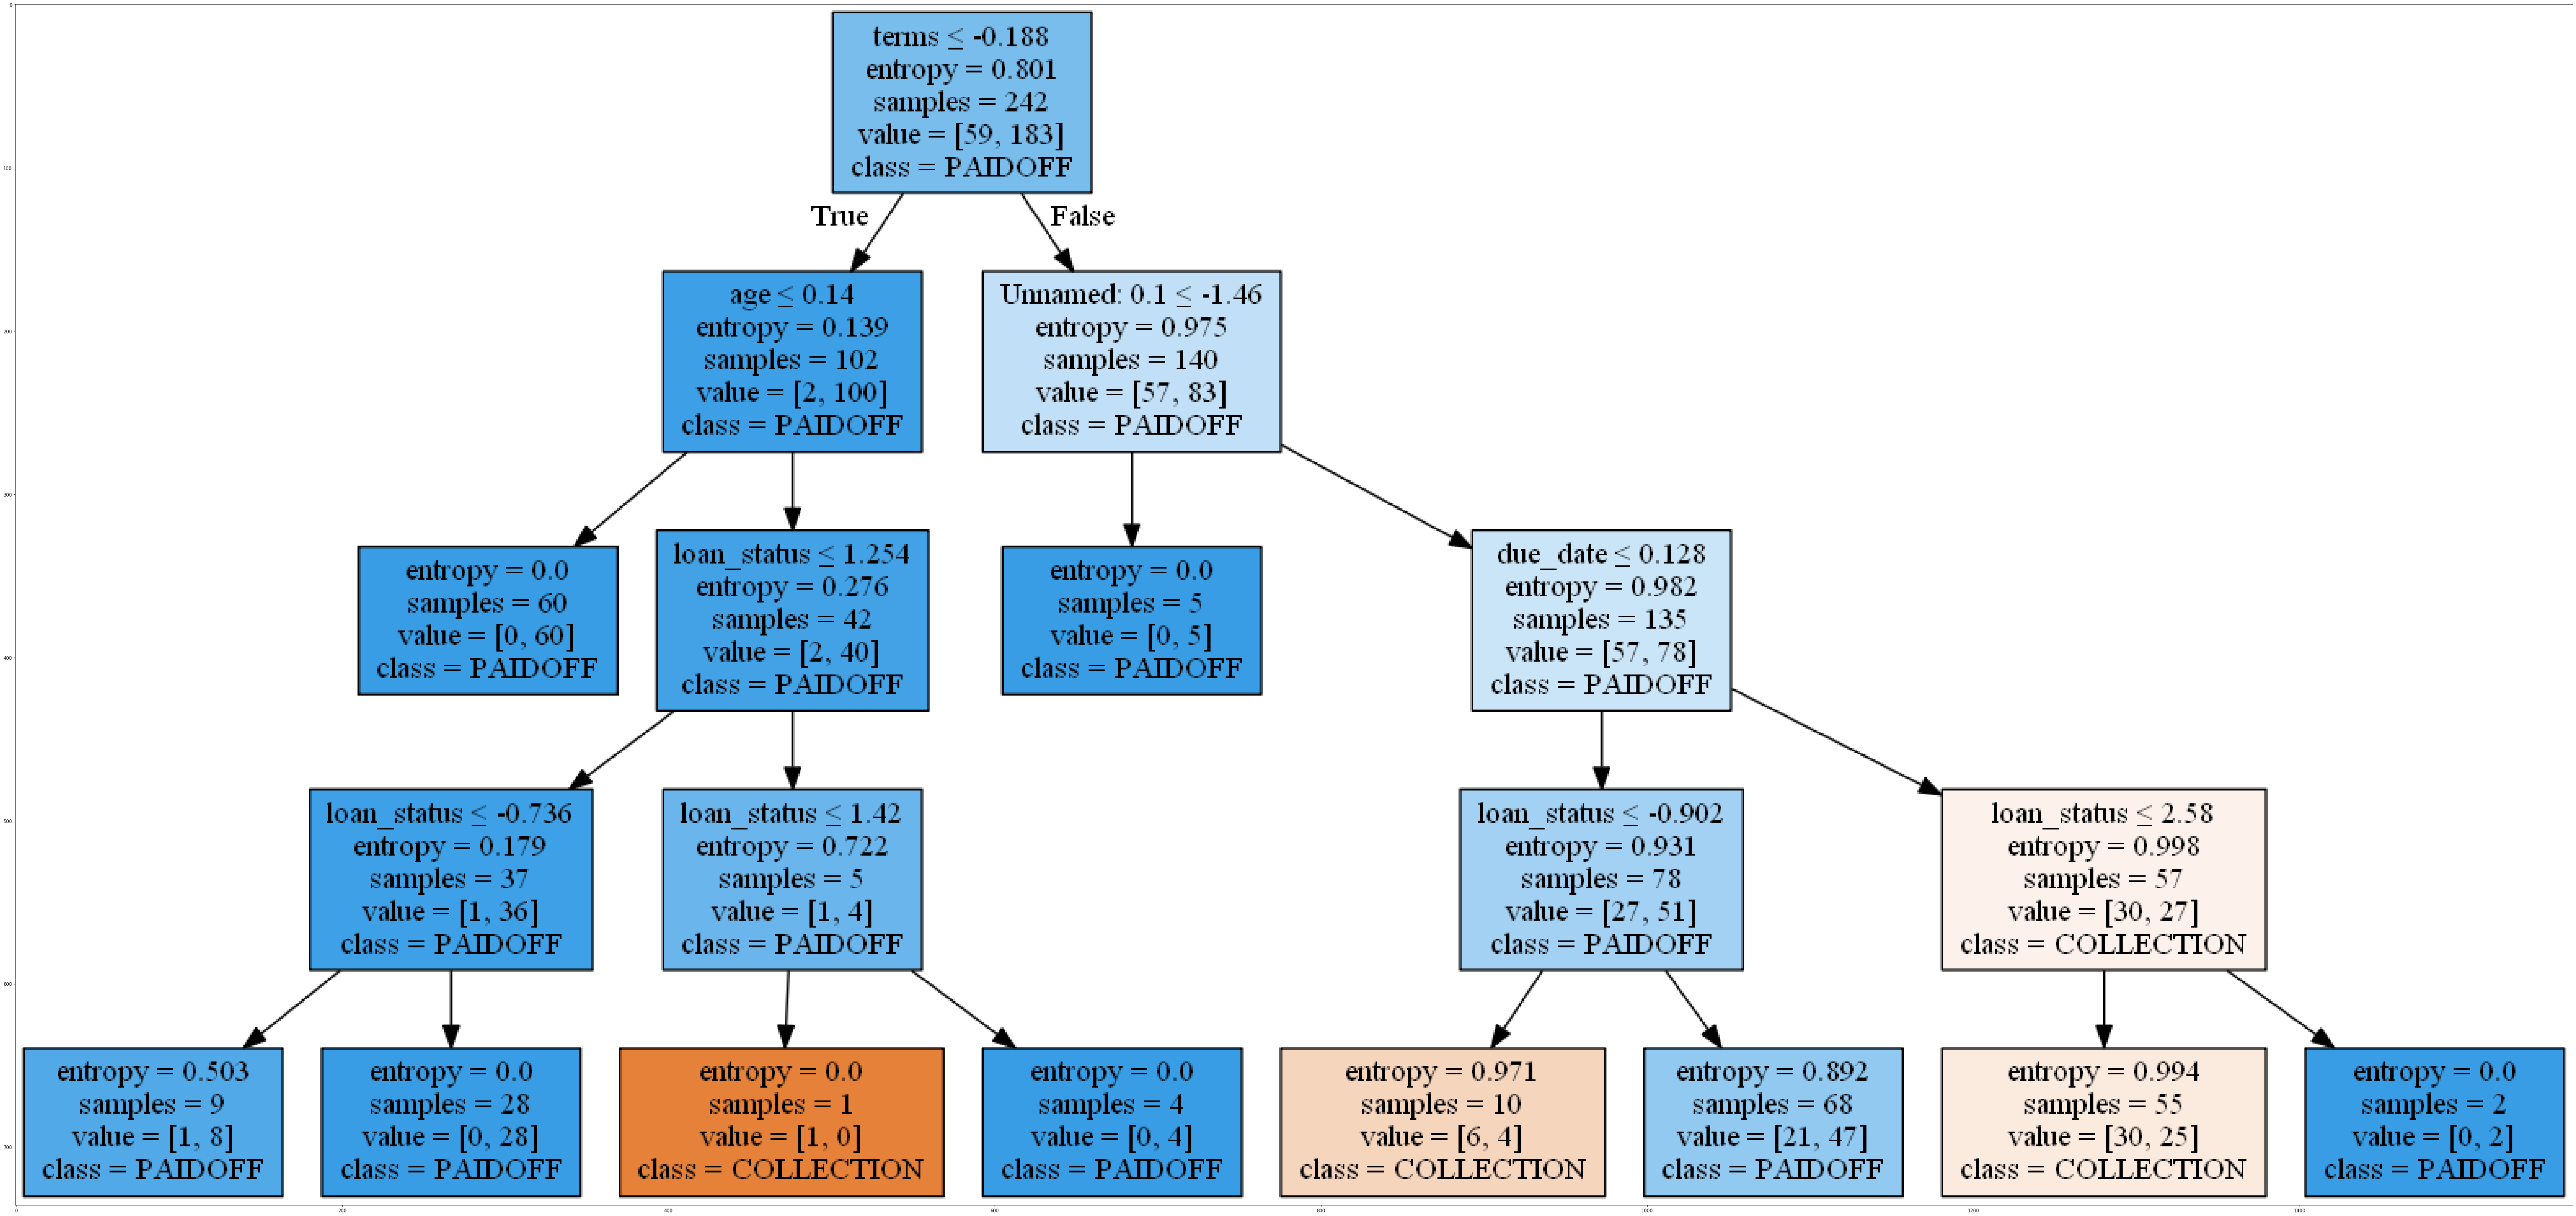

In [47]:
dot_data = StringIO()
filename = "loantree.png"
featureNames = df.columns[0:8]
targetNames = df["loan_status"].unique().tolist()
out=tree.export_graphviz(my_decision_tree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train_DTC), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

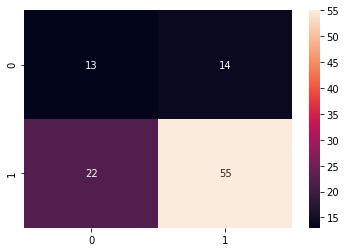

In [48]:
cm = confusion_matrix(y_test_DTC, y_predict_DTC)
sns.heatmap(cm, annot=True)

In [49]:
DTC_jaccard_score = jaccard_score(y_test_DTC, y_predict_DTC, average=None)
DTC_jaccard_score = DTC_jaccard_score[1]
DTC_jaccard_score = float("{:.2f}".format(DTC_jaccard_score))

In [50]:
DTC_jaccard_score

0.6

### Support Vector Machines

In [51]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

1. Linear
2. Polynomial
3. Radial basis function (RBF)
4. Sigmoid
Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset, we usually choose different functions in turn and compare the results. Let's just use the default, RBF (Radial Basis Function) for this lab.

In [52]:
from sklearn.svm import SVC
my_SVM = SVC(kernel = 'rbf')
my_SVM.fit(X_train, y_train)

SVC()

In [53]:
y_predict_svm = my_SVM.predict(X_test)
y_predict_svm[0:5]

array(['COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [54]:
print("Training set accuracy : ", accuracy_score(y_train, my_SVM.predict(X_train)))
print("Testing set accuracy : ", accuracy_score(y_test, my_SVM.predict(X_test)))

Training set accuracy :  0.782608695652174
Testing set accuracy :  0.7428571428571429


In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_svm))

              precision    recall  f1-score   support

  COLLECTION       0.36      0.27      0.31        15
     PAIDOFF       0.81      0.87      0.84        55

    accuracy                           0.74        70
   macro avg       0.59      0.57      0.57        70
weighted avg       0.72      0.74      0.73        70



In [56]:
from sklearn.metrics import jaccard_score
jaccard_score_SVM = jaccard_score(y_test, y_predict_svm, average = None)
jaccard_score_SVM = jaccard_score_SVM[1]
jaccard_score_SVM

0.7272727272727273

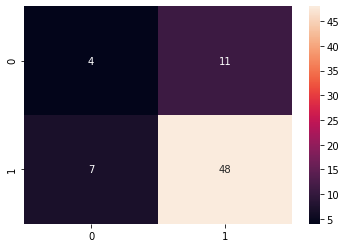

In [57]:
cm = confusion_matrix(y_test, y_predict_svm)
sns.heatmap(cm, annot=True)

In [58]:
f1_score(y_test, y_predict_svm, average='weighted')

0.7275882012724117

Note: It is possible to change the kernel and rebuild the model to possibly increase the efficiency and accuracy of the model.

### Logistic Regression

In [59]:
X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train_LR.shape,  y_train_LR.shape)
print ('Test set:', X_test_LR.shape,  y_test_LR.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


Lets build our model using LogisticRegression from Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. You can find extensive information about the pros and cons of these optimizers if you search it in internet.

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem in machine learning models. C parameter indicates inverse of regularization strength which must be a positive float. Smaller values specify stronger regularization. Now lets fit our model with train set:

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train_LR, y_train_LR)
print(LR)

LogisticRegression(C=0.01, solver='liblinear')


__predict_proba__ returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 1, __P(Y=1|X)__, and second column is probability of class 0, __P(Y=0|X)__:

In [61]:
y_predict_LR = LR.predict(X_test_LR)
y_predict_LR[0:5]

array(['COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [62]:
y_predict_LR_prob = LR.predict_proba(X_test_LR)
print(y_predict_LR_prob)

[[0.5034238  0.4965762 ]
 [0.45206111 0.54793889]
 [0.30814132 0.69185868]
 [0.34259428 0.65740572]
 [0.32025894 0.67974106]
 [0.31680537 0.68319463]
 [0.48830185 0.51169815]
 [0.47823073 0.52176927]
 [0.34259428 0.65740572]
 [0.4934056  0.5065944 ]
 [0.33806706 0.66193294]
 [0.49662231 0.50337769]
 [0.24891907 0.75108093]
 [0.3419095  0.6580905 ]
 [0.43751789 0.56248211]
 [0.25760497 0.74239503]
 [0.52357188 0.47642812]
 [0.30450278 0.69549722]
 [0.50166363 0.49833637]
 [0.3195971  0.6804029 ]
 [0.44276988 0.55723012]
 [0.49410185 0.50589815]
 [0.51350333 0.48649667]
 [0.47203498 0.52796502]
 [0.40944694 0.59055306]
 [0.50846442 0.49153558]
 [0.51098415 0.48901585]
 [0.37457647 0.62542353]
 [0.50418423 0.49581577]
 [0.25299635 0.74700365]
 [0.46824113 0.53175887]
 [0.46024688 0.53975312]
 [0.46206917 0.53793083]
 [0.48402425 0.51597575]
 [0.38818191 0.61181809]
 [0.45821326 0.54178674]
 [0.50166363 0.49833637]
 [0.28973585 0.71026415]
 [0.4569882  0.5430118 ]
 [0.45494718 0.54505282]


Lets try __Jaccard index__ for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of two label sets. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is __1.0__; otherwise it is __0.0__.

In [63]:
jaccard_score_LR = jaccard_score(y_test_LR, y_predict_LR, average = None)
jaccard_score_LR = jaccard_score_LR[1]
jaccard_score_LR = float("{:.2f}".format(jaccard_score_LR))
jaccard_score_LR

0.68

In [64]:
print(classification_report(y_test_LR,y_predict_LR))

              precision    recall  f1-score   support

  COLLECTION       0.18      0.13      0.15        15
     PAIDOFF       0.78      0.84      0.81        55

    accuracy                           0.69        70
   macro avg       0.48      0.48      0.48        70
weighted avg       0.65      0.69      0.67        70



Based on the count of each section, we can calculate precision and recall of each label:

 - __Precision__ is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

 - __Recall__ is true positive rate. It is defined as: Recall =  TP / (TP + FN)

__F1 score__: Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label.

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.

And finally, we can tell the average accuracy for this classifier is the average of the F1-score for both labels, which is 0.67 in our case.

### Evaluating the model using the Test Set

In [65]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [66]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-11-09 19:34:20--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: 'loan_test.csv'

     0K ...                                                   100% 9.53M=0s

2020-11-09 19:34:21 (9.53 MB/s) - 'loan_test.csv' saved [3642/3642]



In [67]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [68]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_Feature = test_df[['Principal','terms','age','Gender','weekend']]
test_Feature = pd.concat([test_Feature,pd.get_dummies(test_df['education'])], axis=1)
test_Feature.drop(['Master or Above'], axis = 1,inplace=True)
test_X = StandardScaler().fit(test_Feature).transform(test_Feature)
test_X[0:5]

array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211, -1.30384048,
         2.39791576, -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211,  0.76696499,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  0.76696499,
         2.39791576, -0.79772404, -0.86135677]])

In [69]:
test_y = test_df['loan_status'].values
test_y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

### KNN results

In [70]:
# K Nearest Neighbor (KNN)
test_yhat= my_KNN_classifier.predict(test_X)

# Calculating the Jaccard Score for KNN
KNN_Jaccard = jaccard_score(test_y, test_yhat, average=None)
KNN_Jaccard = KNN_Jaccard[1]
KNN_jaccard = float("{:.2f}".format(KNN_Jaccard))
print("KNN - jaccard accuracy = " , KNN_Jaccard)

# f1_score
KNN_f1_score = f1_score(test_y, test_yhat, average='weighted') 
KNN_f1_score = float("{:.2f}".format(KNN_f1_score))
print("KNN - f1 score accuracy = " , KNN_f1_score)

KNN - jaccard accuracy =  0.6862745098039216
KNN - f1 score accuracy =  0.67


### Decision Tree Results

In [71]:
# Decision Tree
test_yhat = my_decision_tree.predict(test_X)

# jaccard
DTree_Jaccard = jaccard_score(test_y, test_yhat, average=None)
DTree_Jaccard = DTree_Jaccard[1]
DTree_Jaccard = float("{:.2f}".format(DTree_Jaccard))
print("Decision Tree - jaccard accuracy = " , DTree_Jaccard)

# f1_score
DTree_f1_score = f1_score(test_y, test_yhat, average='weighted')
DTree_f1_score = float("{:.2f}".format(DTree_f1_score))
print("Decision Tree - f1 score accuracy = " , DTree_f1_score)

Decision Tree - jaccard accuracy =  0.73
Decision Tree - f1 score accuracy =  0.78


### SVM Results

In [72]:
# Support Vector Machine
test_yhat = my_SVM.predict(test_X)

# jaccard
SVM_Jaccard = jaccard_score(test_y, test_yhat, average=None)
SVM_Jaccard = SVM_Jaccard[1]
SVM_Jaccard = float("{:.2f}".format(SVM_Jaccard))
print("Support Vector Machine - jaccard accuracy = " , SVM_Jaccard)

# f1_score
SVM_f1_score = f1_score(test_y, test_yhat, average='weighted') 
SVM_f1_score = float("{:.2f}".format(SVM_f1_score))
print("Support Vector Machine - f1 score accuracy = " , SVM_f1_score)


Support Vector Machine - jaccard accuracy =  0.78
Support Vector Machine - f1 score accuracy =  0.76


### Logistic Regression Results

In [73]:
#Logistic Regression
test_yhat = LR.predict(test_X)
test_yhat_prob = LR.predict_proba(test_X)

# jaccard
LGR_Jaccard = jaccard_score(test_y, test_yhat, average=None)
LGR_Jaccard = LGR_Jaccard[1]
LGR_Jaccard = float("{:.2f}".format(LGR_Jaccard))
print("Logistic Regression - jaccard accuracy = " , LGR_Jaccard)

# f1_score
LGR_f1_score = f1_score(test_y, test_yhat, average='weighted')
LGR_f1_score = float("{:.2f}".format(LGR_f1_score))
print("Logistic Regression - f1 score accuracy = " , LGR_f1_score)

LGR_log_loss = log_loss(test_y, test_yhat_prob)
LGR_log_loss = float("{:.2f}".format(LGR_log_loss))
print("Logistic Regression - log loss = " , LGR_log_loss)

Logistic Regression - jaccard accuracy =  0.74
Logistic Regression - f1 score accuracy =  0.66
Logistic Regression - log loss =  0.57


In [74]:
# Print the Accuracy Report
#col_names = ['Algorithm', 'Jaccard', 'F1-score', 'LogLoss']
algorithm_list = ['KNN', 'Decision Tree', 'SVM', 'LoisticRegression']
Jaccard_list = [KNN_Jaccard, DTree_Jaccard, SVM_Jaccard, LGR_Jaccard]
F1_score_list = [KNN_f1_score, DTree_f1_score, SVM_f1_score, LGR_f1_score]
LogLoss_list = ['NA', 'NA', 'NA', LGR_log_loss]

df = pd.DataFrame(list(zip(algorithm_list, Jaccard_list, F1_score_list, LogLoss_list)),
              columns=['Algorithm','Jaccard', 'F1-score', 'LogLoss'])

df.set_index('Algorithm', inplace = True)
df

,Jaccard,F1-score,LogLoss
Algorithm,,,
KNN,0.686275,0.67,NA
Decision Tree,0.730000,0.78,NA
SVM,0.780000,0.76,NA
LoisticRegression,0.740000,0.66,0.57
